In [2]:
from advisor_backend.interface import Interface
import matplotlib.pyplot as plt
import numpy as np

# Timeline调优分析

## 1. Timeline分析的数据准备
我们当前支持Ascend PyTorch Profiler方式采集后的ascend_pt目录，并支持单独分析ascend_pt/ASCEND_PROFILER_OUTPUT目录下的trace_view.json文件。

## 2. Timeline分析解决的问题
当前的功能主要有三项：1）识别当前可选择的NPU亲和优化器；2）PTA调度分析（分析TaskQueue消费能力）；3）CANN调度分析（分析CANN组件算子下发到Device侧的效率）

In [4]:
# EDIT THE PROFILING DATA PATH
timeline_path = "[YOUR PATH]"
interface = Interface(timeline_path)

### 1）亲和优化器识别

In [5]:
dataset = interface.get_data('timeline', 'optimizer')
# 打印当前使用的优化器
data = dataset.get('data')
print(data)

# 如果使用了原生优化器，则打印优化建议
advice = dataset.get('advice')
print(advice)

[INFO] Start to analyse the target file: [YOUR PATH]
['Optimizer.step#AdamW.step']
You can choose torch_npu.optim.NpuFusedAdamW to replace the current Optimizer: Optimizer.step#AdamW.step.


### 2）PTA调度分析

[INFO] Start to analyse the target file: [YOUR PATH]


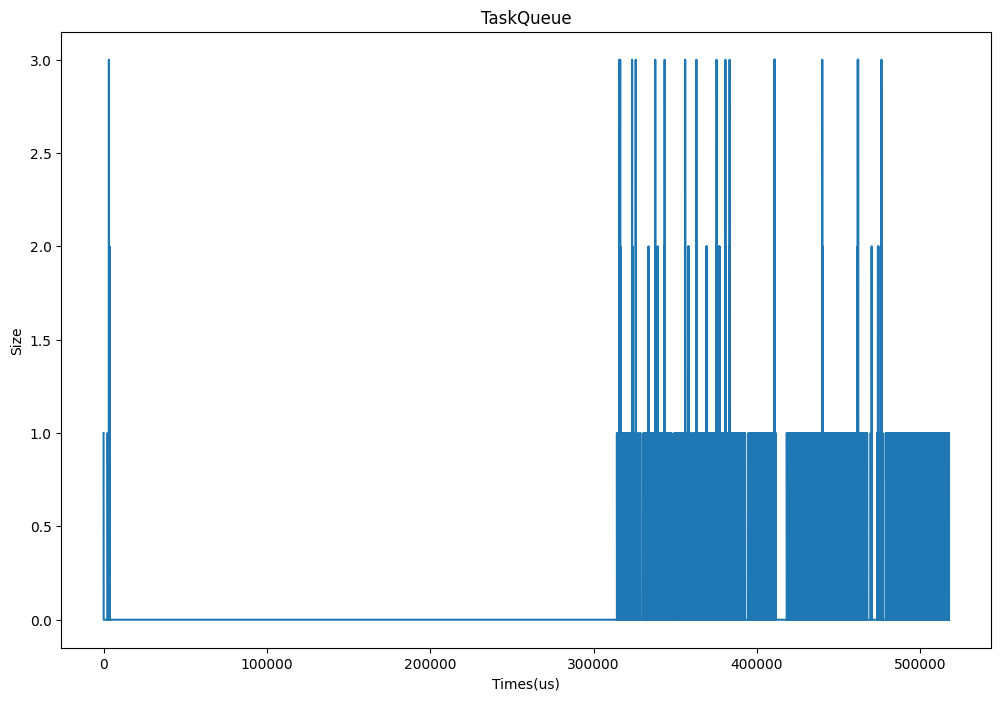

The proportion of scheduling time is 8.38%.


In [6]:
dataset = interface.get_data('timeline', 'torch_sche')
data = dataset.get('data')

x = [entry[0] for entry in data]
y = [entry[1] for entry in data]

plt.figure(figsize=(12, 8))
plt.xlabel('Times(us)')
plt.ylabel('Size')
plt.title('TaskQueue')

plt.plot(x, y)
plt.show()
print(dataset.get('bottleneck'))

### 3）CANN调度分析

[INFO] Start to analyse the target file: [YOUR PATH]


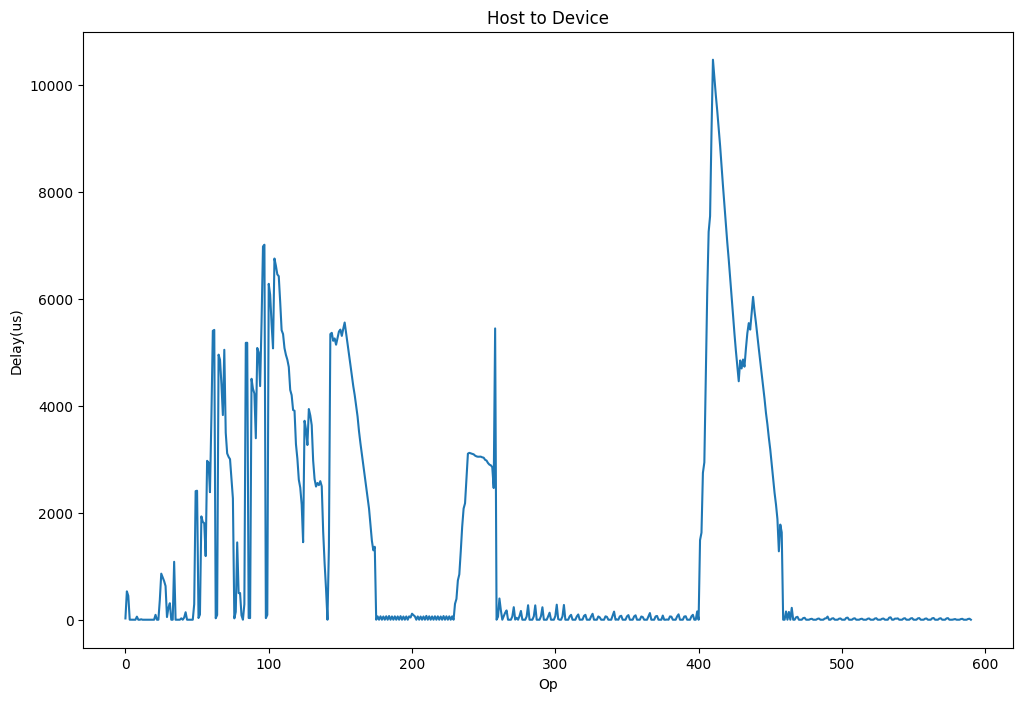

The proportion of scheduling time is 23.66%, computing time is 9.51%,and communication time is 66.82%.


In [7]:
dataset = interface.get_data('timeline', 'cann_sche')
data = dataset.get('data')

x = [i for i in range(len(data))]
y = [entry[1] for entry in data]

plt.figure(figsize=(12, 8))
plt.xlabel('Op')
plt.ylabel('Delay(us)')
plt.title('Host to Device')

plt.plot(x, y)
plt.show()
print(dataset.get('bottleneck'))